## Import Libraries

In [1]:
import nltk
import numpy as np
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import string
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import layers
# from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
# import os
import seaborn as sns
import pickle

nltk.download("wordnet")
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("omw-1.4")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abdulelah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdulelah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abdulelah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\abdulelah\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
DataSet = pd.read_csv("POSITIVE_OR_NEGATIVE.csv", encoding='utf-8') #Reading the dataset

In [3]:
DataSet.head(20) # this function shows you the number of row that you want from the dataset

,label,text
0,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
1,Positive,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2,Positive,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
3,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4,Positive,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...
5,Positive,أسلوب الكاتب رائع جدا و عميق جدا، قرأته عدة مر...
6,Positive,استثنائي. الهدوء في الجناح مع مسبح. عدم وجود ع...
7,Positive,الكتاب هو السيرة الذاتية للحداثة في المملكة بل...
8,Positive,من أجمل ما قرأت.. رواية تستحق القراءة فعلا..
9,Positive,بشكل عام جيده .. . التجاوب جيد جدا من قبل موظف...


In [4]:
print(DataSet['label'].unique()) 
DataSet["label"].value_counts() #Label refers to the attribute name in the dataset

['Positive' 'Negative']


label
Positive    33333
Negative    33333
Name: count, dtype: int64

## Check Missing Data and Duplicates

In [5]:
print(DataSet.isnull().sum()) #this show the null varibles in the dataset
print("\n")
duplicatesDroped = len(DataSet) - len(DataSet.drop_duplicates())
print("Number of duplicates droped:" )
print(duplicatesDroped) #this shows numbers of duplicates is the dataset 
DataSet.drop_duplicates(inplace = True) # this removes any duplicates

label    0
text     0
dtype: int64


Number of duplicates droped:
0


## Data Visualization

<Axes: ylabel='count'>

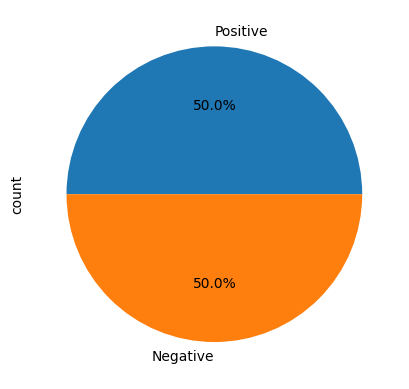

In [6]:
ratio_positive_and_negative = DataSet["label"].value_counts()
ratio_positive_and_negative.plot.pie(autopct = '%1.1f%%')

# Preparing the corpus

In [7]:
from farasa.segmenter import FarasaSegmenter
farasa_segmenter = FarasaSegmenter(interactive=True)
from nltk.stem import ISRIStemmer
stemmer = ISRIStemmer() # supports arabic stemming

def preprocess(text):
    text = re.sub(r'[^\u0621-\u064A ]+', ' ', text)  # allows all Arabic letters and spaces

    # text = farasa_segmenter.segment(text)
    
    words = text.split() # splits/tokenize the data by the default rule which is any space
    #words = word_tokenize(text) # also tokenize but is more sophisticated especially for english but we didn't feel the result were appropriate
    #words = [word for word in words if word not in stopwords.words("arabic")] # remove stop words from corpus
    words = [stemmer.stem(word) for word in words] # do stemming on the corpus 
    text = " ".join(words)
    return text

[2023-06-09 13:33:15,168 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


In [8]:
# DataSet is a DataFrame which is a two dimensional tabular data structure e.g. excel sheet or normal table
# we are using .map() to do an operation (preprocess) on the whole column and then save it
DataSet["text"] = DataSet.text.map(preprocess)
print(DataSet["text"].values)  

['متز نوع ما نظف وقع جهز شاطيء طعم'
 'احد سبب نجح امر ان كل شخص في هذه دول عشق ترب نحن نحب امر ومض من فكر نصح لدل طمح صفف ولى و قئد لا قبل الا برح شعب وفر كل سب عيش كرم حكم و وقف نصح لكل فرد فين ليس جرد كتب سيس كما كنت عقد سحق قرء رات كثر'
 'هدف وقي نقل من صخب شرع قهر الى هدء جبل شيش عرف على حقق ما جرى فى تلك بلد من حرب ضرب بحق سلم و جزء كبر من ارخ تلك نطق ضحي رجل وفء كثر من قيم خرى اثب وجد فى تلك روي بسط'
 ... 'كتب ضعف جدا ولم متع به فى كل قصه سرد لحل او شهد بدن فكر قصه'
 'ملة جدا حمد حسن علو فنن كلم وصف عند دقق وزد عن حد لزم هذا ثني كتب قرء كتب على امل اني احب كتب لكن اسف كان سيء زي اول'
 'لن رجع اله مرة خرى قرب من بحر كان قدم ولا وجد فيه خدم ربع نجم']


In [9]:
#finding length of the maximum sequence of all the text in the dataset
maxSeq = len(DataSet["text"][0]) # start with the column "text" and the first element as the maxSeq
for i in range (0,len(DataSet["text"])):
    try:
        cur = len(DataSet["text"][i])
        if (cur > maxSeq):
            maxSeq = cur
    except:
        pass

In [10]:
from collections import Counter
# a function to count the occurrence of each word in a text column(text)
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

# call counter_word() for our data set
counter = counter_word(DataSet.text)

# Set the maximum number of words to the total number of unique words in the 'text' column of the dataset
MAX_NUM_WORDS = len(counter)

# Set the maximum sequence length to the value of maxSeq
MAX_SEQUENCE_LENGTH = maxSeq

# Fitting and saving the tokenizer

In [11]:
# Set the embedding dimension
EMBEDDING_DIM = 100 # how many features in each vector

# Create a Tokenizer object with a maximum vocabulary size of MAX_NUM_WORDS
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)

# Fit the tokenizer on the reviews in the 'text' column of the dataset
tokenizer.fit_on_texts(DataSet['text'].values)

# Save the tokenizer object to a file using pickle
with open("./model and toknizers/tokenizer_NO_STOPWORDS.pickle", "wb") as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [12]:
# Convert the reviews in the 'text' column of the dataset to sequences of integers using the tokenizer
X = tokenizer.texts_to_sequences(DataSet['text'].values)
print(DataSet['text'].values)
# Pad the sequences to a fixed length of MAX_SEQUENCE_LENGTH with zeros
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

# Print the shape of the data tensor (number of sequences, each one with this number of tokens)
print('Shape of data tensor:', X.shape)

['متز نوع ما نظف وقع جهز شاطيء طعم'
 'احد سبب نجح امر ان كل شخص في هذه دول عشق ترب نحن نحب امر ومض من فكر نصح لدل طمح صفف ولى و قئد لا قبل الا برح شعب وفر كل سب عيش كرم حكم و وقف نصح لكل فرد فين ليس جرد كتب سيس كما كنت عقد سحق قرء رات كثر'
 'هدف وقي نقل من صخب شرع قهر الى هدء جبل شيش عرف على حقق ما جرى فى تلك بلد من حرب ضرب بحق سلم و جزء كبر من ارخ تلك نطق ضحي رجل وفء كثر من قيم خرى اثب وجد فى تلك روي بسط'
 ... 'كتب ضعف جدا ولم متع به فى كل قصه سرد لحل او شهد بدن فكر قصه'
 'ملة جدا حمد حسن علو فنن كلم وصف عند دقق وزد عن حد لزم هذا ثني كتب قرء كتب على امل اني احب كتب لكن اسف كان سيء زي اول'
 'لن رجع اله مرة خرى قرب من بحر كان قدم ولا وجد فيه خدم ربع نجم']
Shape of data tensor: (66666, 6106)


In [13]:
from sklearn import preprocessing

# Create a LabelEncoder object
labelencoder = preprocessing.LabelEncoder()

# Encode the target labels with values between 0 and n_classes-1
DataSet['label'] = labelencoder.fit_transform(DataSet['label']) # The fit_transform() method fits and transforms the labels into a numerical format. The numerical format is determined by the encoder, and is typically a sequence of integers starting from 0.

# Extract the encoded target labels as a numpy array
Y = DataSet['label'].values
print(Y)
# Print the shape of the label tensor
print('Shape of label tensor:', Y.shape)

[1 1 1 ... 0 0 0]
Shape of label tensor: (66666,)


In [15]:
from sklearn.model_selection import train_test_split
# test_size:the number that defines the size of the test set----random state: exposes a number of methods for generating random numbers drawn from a variety of probability distributions
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42) 
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(53332, 6106) (53332,)
(13334, 6106) (13334,)



# Training the model 

In [16]:
# Create a sequential model
model = tensorflow.keras.models.Sequential() 

# Add an embedding layer to the model with the specified maximum number of words and embedding dimension
model.add(layers.Embedding(MAX_NUM_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))

# Add an LSTM layer to the model with 32 units
model.add(layers.LSTM(32))

# Add a dense output layer to the model with a sigmoid activation function
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss, the Adam optimizer, and accuracy as a metric
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print a summary of the model architecture
print(model.summary())

history = model.fit(X_train, Y_train, epochs=10, batch_size=64,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
 #the dataset is split into 20% 80% which mean 80% for traning and 20% for testing
 #epochs is the total number of iterations of all the training data in one cycle for training the machine learning model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 6106, 100)         4795500   
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,812,557
Trainable params: 4,812,557
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
140/667 [=====>........................] - ETA: 3:18 - loss: 0.6115 - accuracy: 0.6834

KeyboardInterrupt: 

# Model Evaluation

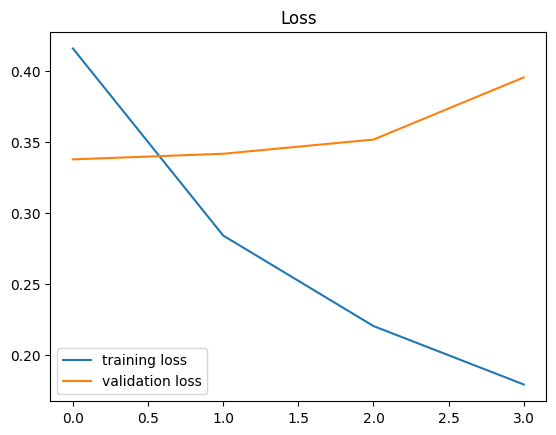

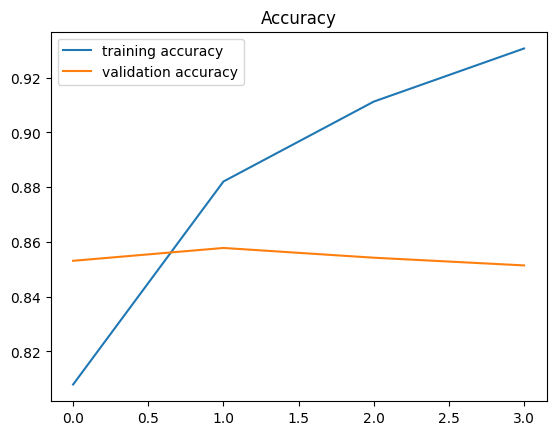

In [30]:
# Plot the training and validation loss
plt.title('Loss')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# Print a blank line for better readability
print("\n")

# Plot the training and validation accuracy
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [41]:
# Set the classification threshold
threshold_value = 0.5 

# Generate predicted labels for the test set using the trained model
predicted_labels = model.predict(X_test, verbose=2)

# Apply the classification threshold to the predicted labels to obtain binary predictions
binary_predictions = predicted_labels > threshold_value
binary_predictions = binary_predictions.astype(int)

# Import and use the classification report function from sklearn.metrics to calculate performance metrics
from sklearn.metrics import classification_report 
target_names = ['POSITIVE', 'NEGATIVE']
print(classification_report(Y_test, binary_predictions, target_names=target_names))

417/417 - 63s - 63s/epoch - 152ms/step
              precision    recall  f1-score   support

    POSITIVE       0.84      0.86      0.85      6677
    NEGATIVE       0.85      0.84      0.85      6657

    accuracy                           0.85     13334
   macro avg       0.85      0.85      0.85     13334
weighted avg       0.85      0.85      0.85     13334



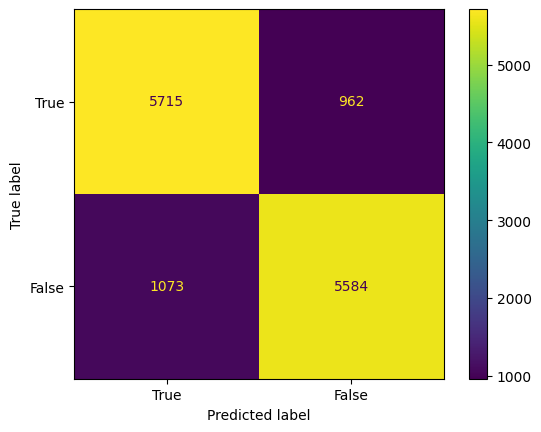

In [42]:
confusion_matrix = metrics.confusion_matrix(Y_test, binary_predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = [True, False])

cm_display.plot()
plt.show()

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, binary_predictions)
cm_df = pd.DataFrame(cm, index = target_names, columns = target_names)
cm_df.head()

,POSITIVE,NEGATIVE
POSITIVE,5715,962
NEGATIVE,1073,5584


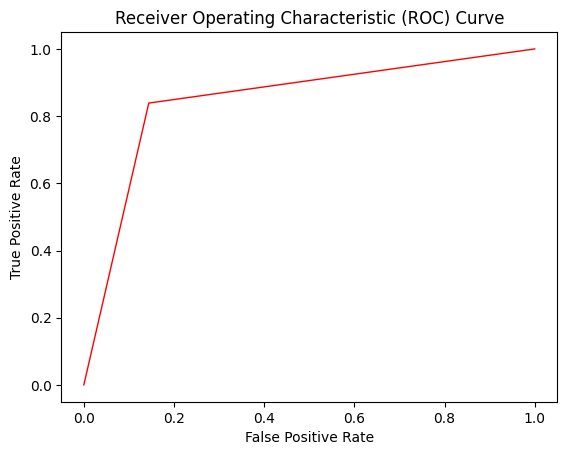

Area under the ROC curve: 0.8473698012335049


In [44]:
# Define an array of cutoff values
cutoffs = np.linspace(0.0, 1.0, 100)

# Initialize empty lists to hold false positive rates and true positive rates
fpr_list = []
tpr_list = []

# Calculate the false positive rate, true positive rate, and cutoff values using the roc_curve function
fpr, tpr, _ = metrics.roc_curve(Y_test, binary_predictions, pos_label=1)

# Plot the ROC curve using the false positive rate and true positive rate values
plt.plot(fpr, tpr, color='red', linewidth=1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

# Calculate the area under the ROC curve using the roc_auc_score function
roc_auc = metrics.roc_auc_score(Y_test, binary_predictions)

# Print the area under the ROC curve
print("Area under the ROC curve:", roc_auc)

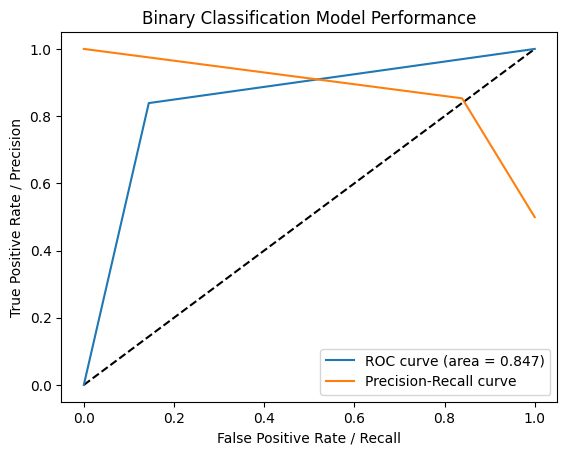

In [45]:
# Calculate the false positive rate, true positive rate, and thresholds using the roc_curve function
fpr, tpr, thresholds = metrics.roc_curve(Y_test, binary_predictions)

# Calculate the area under the ROC curve using the auc function
auc_score = metrics.auc(fpr, tpr)

# Calculate the precision, recall, and threshold values using the precision_recall_curve function
precision, recall, th = metrics.precision_recall_curve(Y_test, binary_predictions)

# Plot the ROC curve, Precision-Recall curve, and a diagonal line representing random guessing
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % auc_score)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.title('Binary Classification Model Performance')
plt.xlabel('False Positive Rate / Recall')
plt.ylabel('True Positive Rate / Precision')
plt.legend(loc='best')
plt.show()

## Save Model

In [46]:
model.save("./model and toknizers/NO_STOPWORDS.h5") #this funcaion saves the model

## Model Testing

In [47]:
import tensorflow as tf
import pickle

# Load the model
loaded_model = tf.keras.models.load_model("./model and toknizers/NO_STOPWORDS.h5")

# Take input text from user
test_text = input("Enter the text message: ")
print(test_text)
# Preprocess the input text same as the preprocessing done for the corpus
test_text = preprocess(test_text) 
test_text = [test_text] 

# Load the tokenizer
with open("./model and toknizers/tokenizer_NO_STOPWORDS.pickle", "rb") as handle:
    tokenizer = pickle.load(handle)

# Convert the input text to a sequence of integers
test_seq = tokenizer.texts_to_sequences(test_text)

# Pad the sequence to a fixed length
max_seq_length = loaded_model.input_shape[1]
test_seq = pad_sequences(test_seq, maxlen=max_seq_length)

# Apply the model to the input sequence
threshold = 0.50
binary_predictions = loaded_model.predict(test_seq)[0][0]
print(binary_predictions)

# Print the result
if binary_predictions > threshold:
    print("POSITIVE")
else:
    print("NEGATIVE")

انت شخص جيد
1/1 [==============================] - 1s 574ms/step
0.9015902
POSITIVE
